In [588]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [589]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [590]:
# Load the data per book
book1_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book1.csv')
book2_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book2.csv')
book3_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book3.csv')
book4_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book4.csv')
book5_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book5.csv')

# Make sure that Source < Target in lexicographical order
book1_df[["Source","Target"]].values.sort()
book2_df[["Source","Target"]].values.sort()
book3_df[["Source","Target"]].values.sort()
book4_df[["Source","Target"]].values.sort()
book5_df[["Source","Target"]].values.sort()

book1_df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


# Q1

## (a)

In [591]:
def make_graph(book_df: pd.DataFrame):
  """
  Make graph from single book_df
  Return: nx.Graph object
  """
  ## YOUR CODE STARTS HERE

   # empty undirected graph
  G_book = nx.Graph()

    # Add edges to the graph using the DataFrame
  for _, row in book_df.iterrows():
        source = row['Source']
        target = row['Target']
        weight = row['weight']
        G_book.add_edge(source, target, weight=weight)

  return G_book

book1_G = make_graph(book1_df)

## Print number of nodes and egdes
## YOUR CODE STARTS HERE
print(f"Total nodes: {len(book1_G.nodes())}")
print(f"Total edges: {len(book1_G.edges())}")

Total nodes: 187
Total edges: 684


## (b)

In [592]:
book2_G = make_graph(book2_df)
book3_G = make_graph(book3_df)
book4_G = make_graph(book4_df)
book5_G = make_graph(book5_df)

## YOUR CODE STARTS HERE
# display top 3 edges based on highest weight attribute
b1sorted_edges = sorted(book1_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)
print(f"Book 1 Top edges: {b1sorted_edges[:3]}")
b2sorted_edges = sorted(book2_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)
print(f"Book 2 Top edges: {b2sorted_edges[:3]}")
b3sorted_edges = sorted(book3_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)
print(f"Book 3 Top edges: {b3sorted_edges[:3]}")
b4sorted_edges = sorted(book4_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)
print(f"Book 4 Top edges: {b4sorted_edges[:3]}")
b5sorted_edges = sorted(book5_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)
print(f"Book 5 Top edges: {b5sorted_edges[:3]}")

Book 1 Top edges: [('Eddard-Stark', 'Robert-Baratheon', {'weight': 291}), ('Bran-Stark', 'Robb-Stark', {'weight': 112}), ('Arya-Stark', 'Sansa-Stark', {'weight': 104})]
Book 2 Top edges: [('Tyrion-Lannister', 'Joffrey-Baratheon', {'weight': 92}), ('Tyrion-Lannister', 'Cersei-Lannister', {'weight': 87}), ('Joffrey-Baratheon', 'Sansa-Stark', {'weight': 76})]
Book 3 Top edges: [('Joffrey-Baratheon', 'Tyrion-Lannister', {'weight': 95}), ('Jaime-Lannister', 'Brienne-of-Tarth', {'weight': 87}), ('Jon-Snow', 'Mance-Rayder', {'weight': 83})]
Book 4 Top edges: [('Cersei-Lannister', 'Tommen-Baratheon', {'weight': 80}), ('Cersei-Lannister', 'Margaery-Tyrell', {'weight': 67}), ('Cersei-Lannister', 'Jaime-Lannister', {'weight': 49})]
Book 5 Top edges: [('Daenerys-Targaryen', 'Hizdahr-zo-Loraq', {'weight': 96}), ('Theon-Greyjoy', 'Ramsay-Snow', {'weight': 87}), ('Daenerys-Targaryen', 'Barristan-Selmy', {'weight': 75})]


## (c)

In [593]:
allbook_G = nx.Graph()

allbook_df=pd.concat([book1_df,book2_df,book3_df,book4_df,book5_df])

## YOUR CODE STARTS HERE4
## Hint, df.groupby().sum().reset_index()
## Note that the dataframes are pre-sorted, thus there's no duplicate pairs of ( Source=A,Target=B ) and ( Source=B,Target=A )

# cumulative weight for each unique edge
cumulative_weights = allbook_df.groupby(['Source', 'Target'])['weight'].sum().reset_index()
 #Make the new graph
for _, row in cumulative_weights.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['weight']

    # Add the edge to the graph with the cumulative weight
    allbook_G.add_edge(source, target, weight=weight)

# Get the edges sorted by cumulative weight in descending order
allbooksorted_edges = sorted(allbook_G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

top_edges = allbooksorted_edges[:5]
print(f"Top 5 edges in allbook_G based on cumulative weight \n: {top_edges[:5]}")

Top 5 edges in allbook_G based on cumulative weight 
: [('Eddard-Stark', 'Robert-Baratheon', {'weight': 334}), ('Jon-Snow', 'Samwell-Tarly', {'weight': 228}), ('Joffrey-Baratheon', 'Sansa-Stark', {'weight': 222}), ('Joffrey-Baratheon', 'Tyrion-Lannister', {'weight': 219}), ('Cersei-Lannister', 'Tyrion-Lannister', {'weight': 209})]


# Q2

## (a)

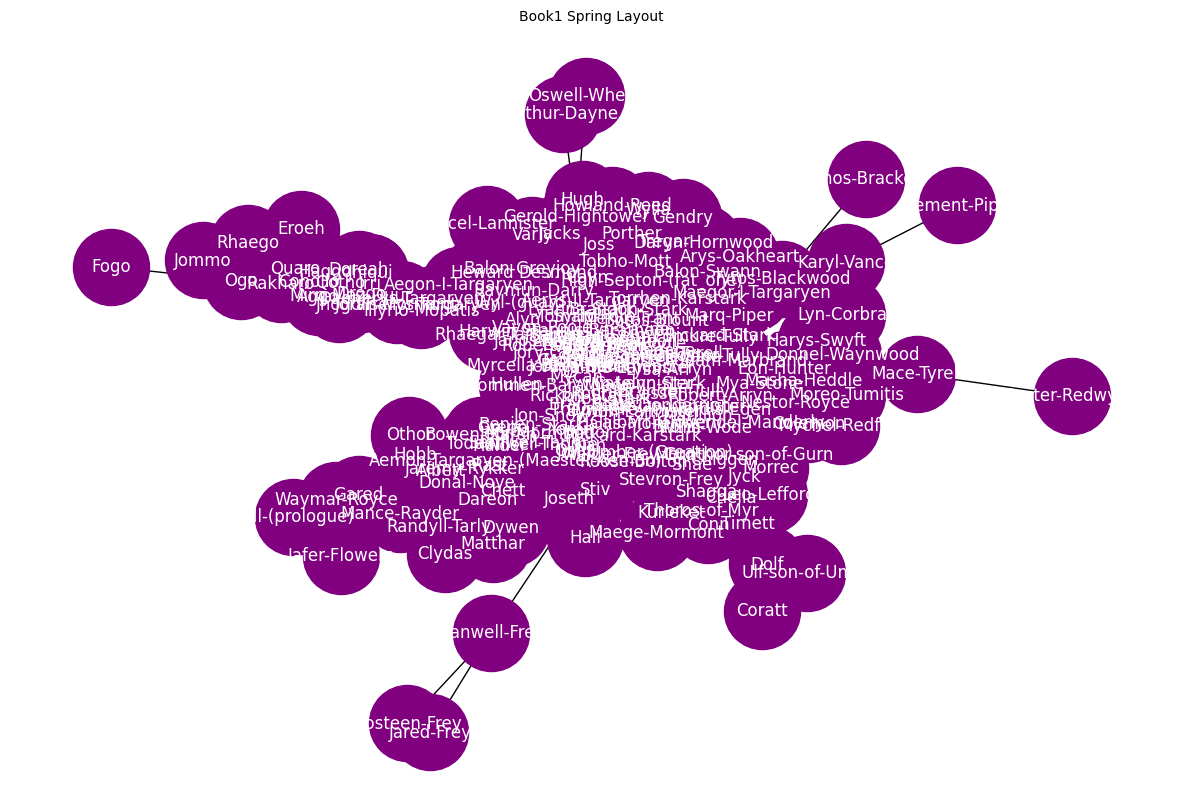

In [594]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spring Layout", fontsize=10)
## YOUR CODE STARTS HERE

nx.draw_spring(
    book1_G, with_labels=True, node_color = "purple", ax=ax, font_color="white", node_size=3000
)
plt.show()

## (b)

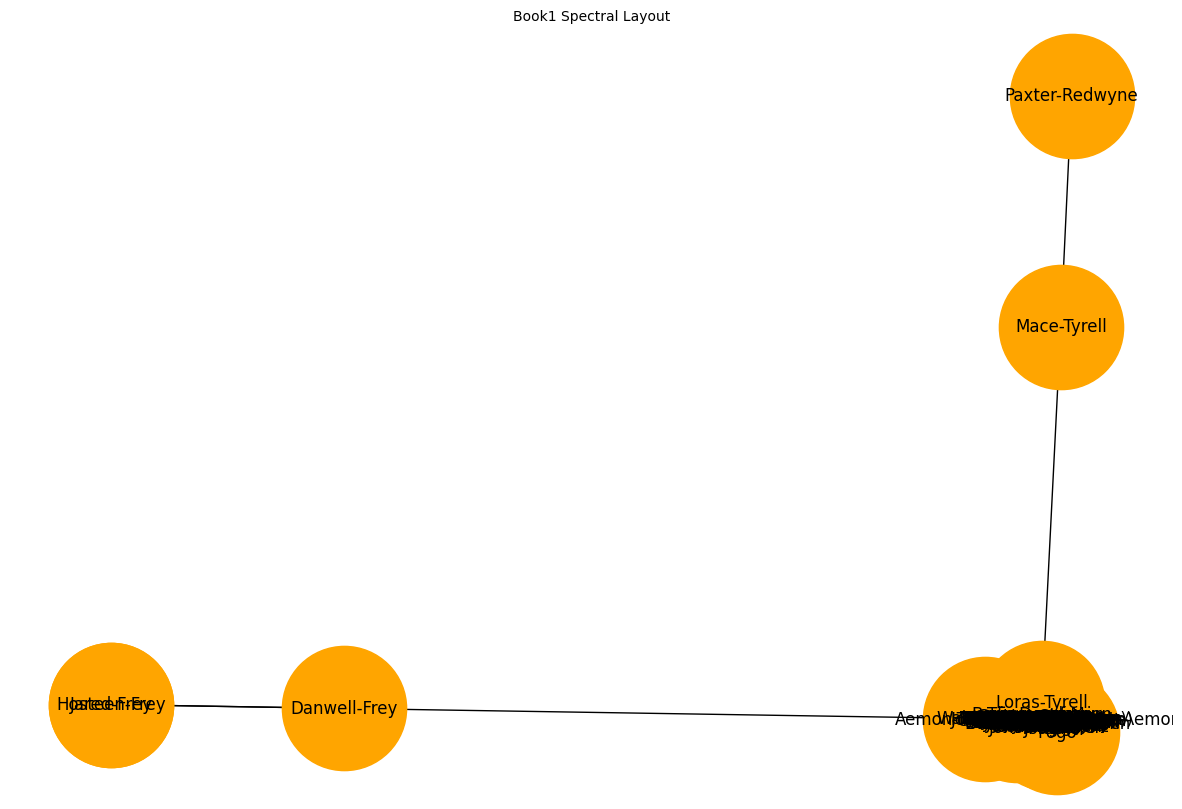

In [595]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spectral Layout", fontsize=10)
## YOUR CODE STARTS HERE
nx.draw_spectral(
    book1_G, with_labels=True, node_color="Orange", ax=ax, font_color="black", node_size=8000
)
plt.show()

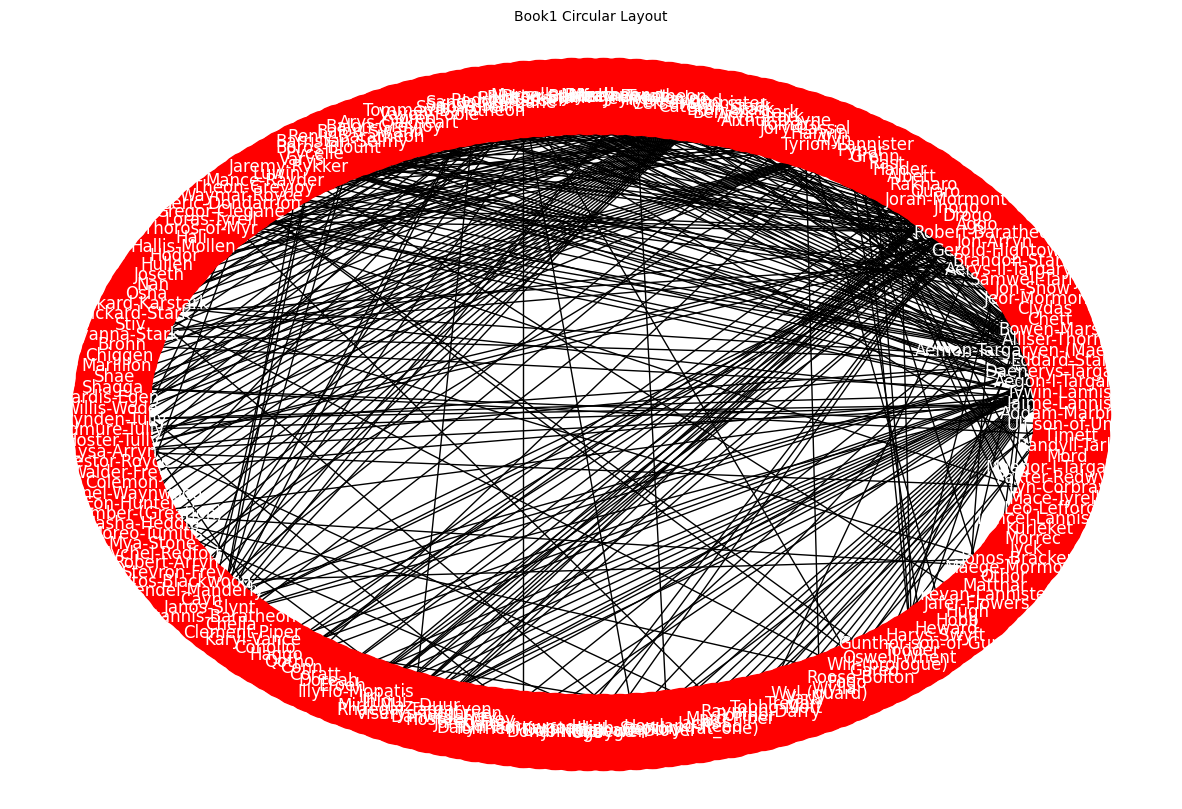

In [596]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Circular Layout", fontsize=10)
## YOUR CODE STARTS HERE
nx.draw_circular(
    book1_G, with_labels=True, node_color="red", ax=ax, font_color="white", node_size=3000
)
plt.show()

# Q3

## (a)

In [597]:
## YOUR CODE STARTS HERE
deg_centrality = nx.degree_centrality(allbook_G)
# Sort nodes by centrality values in descending order
sorted_centrality = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
# Display the top 15 nodes with highest centrality values
top_15_nodes = sorted_centrality[:15]

print("Top 15 nodes with highest degree centrality:")
for node, centrality in top_15_nodes:
    print(f"{node}, {centrality}")

Top 15 nodes with highest degree centrality:
Tyrion-Lannister, 0.15345911949685534
Jon-Snow, 0.14339622641509434
Jaime-Lannister, 0.1270440251572327
Cersei-Lannister, 0.1220125786163522
Stannis-Baratheon, 0.11194968553459118
Arya-Stark, 0.10566037735849056
Catelyn-Stark, 0.09433962264150943
Sansa-Stark, 0.09433962264150943
Robb-Stark, 0.0930817610062893
Eddard-Stark, 0.0930817610062893
Daenerys-Targaryen, 0.09182389937106918
Joffrey-Baratheon, 0.08679245283018867
Theon-Greyjoy, 0.0830188679245283
Robert-Baratheon, 0.08176100628930817
Bran-Stark, 0.06792452830188679


**Enter answer here:** These are major characters that have more influence



## (b)

In [598]:
# PageRank
## YOUR CODE STARTS HERE

pr_centrality = nx.pagerank(allbook_G)
# Sort nodes by centrality values in descending order
prsorted_centrality = sorted(pr_centrality.items(), key=lambda x: x[1], reverse=True)
# Display the top 15 nodes with highest centrality values
PRtop_15_nodes = prsorted_centrality[:15]

print("Top 15 nodes with highest Pagerank centrality:")
for node, pr_centrality in PRtop_15_nodes:
    print(f"Node: {node}, Pagerank : {pr_centrality}")


Top 15 nodes with highest Pagerank centrality:
Node: Jon-Snow, Pagerank : 0.0356937645004584
Node: Tyrion-Lannister, Pagerank : 0.03284906001585236
Node: Cersei-Lannister, Pagerank : 0.023607038592018494
Node: Daenerys-Targaryen, Pagerank : 0.02230688198724802
Node: Jaime-Lannister, Pagerank : 0.019753549619362144
Node: Eddard-Stark, Pagerank : 0.018938219584721857
Node: Arya-Stark, Pagerank : 0.018538944931775433
Node: Stannis-Baratheon, Pagerank : 0.01805167123106783
Node: Joffrey-Baratheon, Pagerank : 0.01742008392061762
Node: Robb-Stark, Pagerank : 0.017344651104667343
Node: Bran-Stark, Pagerank : 0.016699569168749175
Node: Sansa-Stark, Pagerank : 0.016291183713306845
Node: Robert-Baratheon, Pagerank : 0.015677734148541216
Node: Catelyn-Stark, Pagerank : 0.015210743688076967
Node: Theon-Greyjoy, Pagerank : 0.013877294725902392


In [599]:
# Closeness Centrality,
## YOUR CODE STARTS HERE

cl_centrality = nx.closeness_centrality(allbook_G)
# Sort nodes by centrality values in descending order
clsorted_centrality = sorted(cl_centrality.items(), key=lambda x: x[1], reverse=True)
# Display the top 15 nodes with highest centrality values
cltop_15_nodes = clsorted_centrality[:15]

print("Top 15 nodes with highest closeness centrality:")
for node, cl_centrality in cltop_15_nodes:
    print(f"Node: {node}, closeness Centrality: {cl_centrality}")


Top 15 nodes with highest closeness centrality:
Node: Tyrion-Lannister, closeness Centrality: 0.4763331336129419
Node: Robert-Baratheon, closeness Centrality: 0.4592720970537262
Node: Eddard-Stark, closeness Centrality: 0.455848623853211
Node: Cersei-Lannister, closeness Centrality: 0.45454545454545453
Node: Jaime-Lannister, closeness Centrality: 0.4519613416714042
Node: Jon-Snow, closeness Centrality: 0.44537815126050423
Node: Stannis-Baratheon, closeness Centrality: 0.4446308724832215
Node: Robb-Stark, closeness Centrality: 0.4441340782122905
Node: Joffrey-Baratheon, closeness Centrality: 0.4339519650655022
Node: Catelyn-Stark, closeness Centrality: 0.4334787350054526
Node: Sansa-Stark, closeness Centrality: 0.43300653594771243
Node: Arya-Stark, closeness Centrality: 0.43136190992946283
Node: Theon-Greyjoy, closeness Centrality: 0.4233226837060703
Node: Bran-Stark, closeness Centrality: 0.41886195995785036
Node: Tywin-Lannister, closeness Centrality: 0.4112778065183652


In [600]:
# Betweenness Centrality
## YOUR CODE STARTS HERE
betw_centrality = nx.betweenness_centrality(allbook_G)
# Sort nodes by centrality values in descending order
sorted_centrality = sorted(betw_centrality.items(), key=lambda x: x[1], reverse=True)
# Display the top 15 nodes with highest centrality values
Bwtop_15_nodes = sorted_centrality[:15]

print("Top 15 nodes with highest Betweeness centrality:")
for node, betw_centrality in Bwtop_15_nodes:
    print(f"Node: {node}, Degree Centrality: {betw_centrality}")



Top 15 nodes with highest Betweeness centrality:
Node: Jon-Snow, Degree Centrality: 0.1921196196835449
Node: Tyrion-Lannister, Degree Centrality: 0.1621910961115984
Node: Daenerys-Targaryen, Degree Centrality: 0.11841801916269204
Node: Theon-Greyjoy, Degree Centrality: 0.11128331813470228
Node: Stannis-Baratheon, Degree Centrality: 0.11013955266679566
Node: Jaime-Lannister, Degree Centrality: 0.10083800602581632
Node: Cersei-Lannister, Degree Centrality: 0.08870426655860289
Node: Arya-Stark, Degree Centrality: 0.08724236063571153
Node: Eddard-Stark, Degree Centrality: 0.07873239257251873
Node: Robert-Baratheon, Degree Centrality: 0.07822769060383258
Node: Robb-Stark, Degree Centrality: 0.06646842683586629
Node: Catelyn-Stark, Degree Centrality: 0.054973667953404186
Node: Sansa-Stark, Degree Centrality: 0.04869098175180615
Node: Barristan-Selmy, Degree Centrality: 0.045549578315223826
Node: Bran-Stark, Degree Centrality: 0.04491117872765179


## (c)

In [601]:
def draw_centrality(G: nx.Graph, centrality_measure: dict, node_scale: float):
    """
    G: the graph to draw
    centrality_measure: your centrality_measure returned from nx.centrality_measures
    node_scale: the scale of the node size
    """
    fig, ax = plt.subplots(figsize=(12, 10))

    # centrality, cast it to a np.array of floats
    centrality = np.fromiter(centrality_measure.values(), float)

    # plot
    # you choice of layout here, as we see from the Layouts session, spring layout might be the most suitable for this Graph
    # here we fixed the random seed, so the positions are consistent thru multiple runs
    pos = nx.spring_layout(book1_G, seed=42)
    # node_color=centrality and cmap=plt.cm.copper will map the centrality to a linear colorspace
    # you can learn to pick the colormap you like, or customize a colormap here https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps
    # node_size=centrality*node_scale will scale the node_size w.r.t. the centrality
    nx.draw(book1_G, pos, ax=ax, node_color=centrality, node_size=centrality*node_scale, cmap=plt.cm.spring)
    # we also draw the node labels
    nx.draw_networkx_labels(book1_G, pos, ax=ax, font_size=10, font_color="purple")
    # Place a colorbar
    sub_ax = fig.add_axes([0.95, 0.13, 0.01, 0.09])
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.spring),sub_ax)
    plt.show()

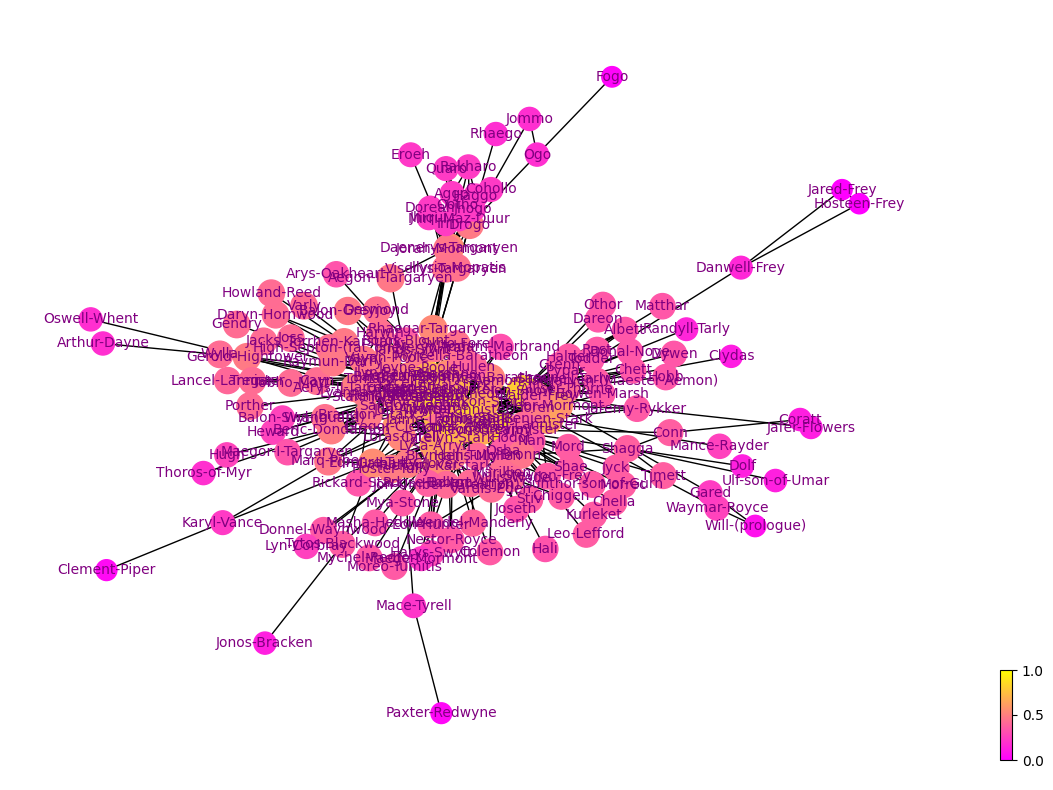

In [602]:
## YOUR CODE STARTS HERE
close_centrality = nx.closeness_centrality(book1_G)
draw_centrality(book1_G, close_centrality, node_scale= 1e3)

# Q4

## (a)

In [603]:
books = [book1_G, book2_G, book3_G, book4_G, book5_G]  # Add your graph objects

for book_num, book_G in enumerate(books, start=1):
    print(f"Book {book_num}")

    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(book_G)

    # Sort nodes by betweenness centrality values in descending order
    sorted_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

    # Display the top-5 PoV characters
    top_5_pov_characters = sorted_centrality[:5]
    for rank, (character, centrality) in enumerate(top_5_pov_characters, start=1):
        print(f"Rank {rank}: Character {character}, Betweenness Centrality: {centrality}")

    print("\n")

Book 1
Rank 1: Character Eddard-Stark, Betweenness Centrality: 0.2696038913836117
Rank 2: Character Robert-Baratheon, Betweenness Centrality: 0.21403028397371796
Rank 3: Character Tyrion-Lannister, Betweenness Centrality: 0.1902124972697492
Rank 4: Character Jon-Snow, Betweenness Centrality: 0.17158135899829566
Rank 5: Character Catelyn-Stark, Betweenness Centrality: 0.1513952715347627


Book 2
Rank 1: Character Arya-Stark, Betweenness Centrality: 0.1881116846731781
Rank 2: Character Jon-Snow, Betweenness Centrality: 0.17443976935054054
Rank 3: Character Robb-Stark, Betweenness Centrality: 0.1649406213117506
Rank 4: Character Tyrion-Lannister, Betweenness Centrality: 0.15532375650368552
Rank 5: Character Robert-Baratheon, Betweenness Centrality: 0.15374366220396257


Book 3
Rank 1: Character Jon-Snow, Betweenness Centrality: 0.2238286056882584
Rank 2: Character Robert-Baratheon, Betweenness Centrality: 0.1664354010358413
Rank 3: Character Robb-Stark, Betweenness Centrality: 0.162320851

## (b)

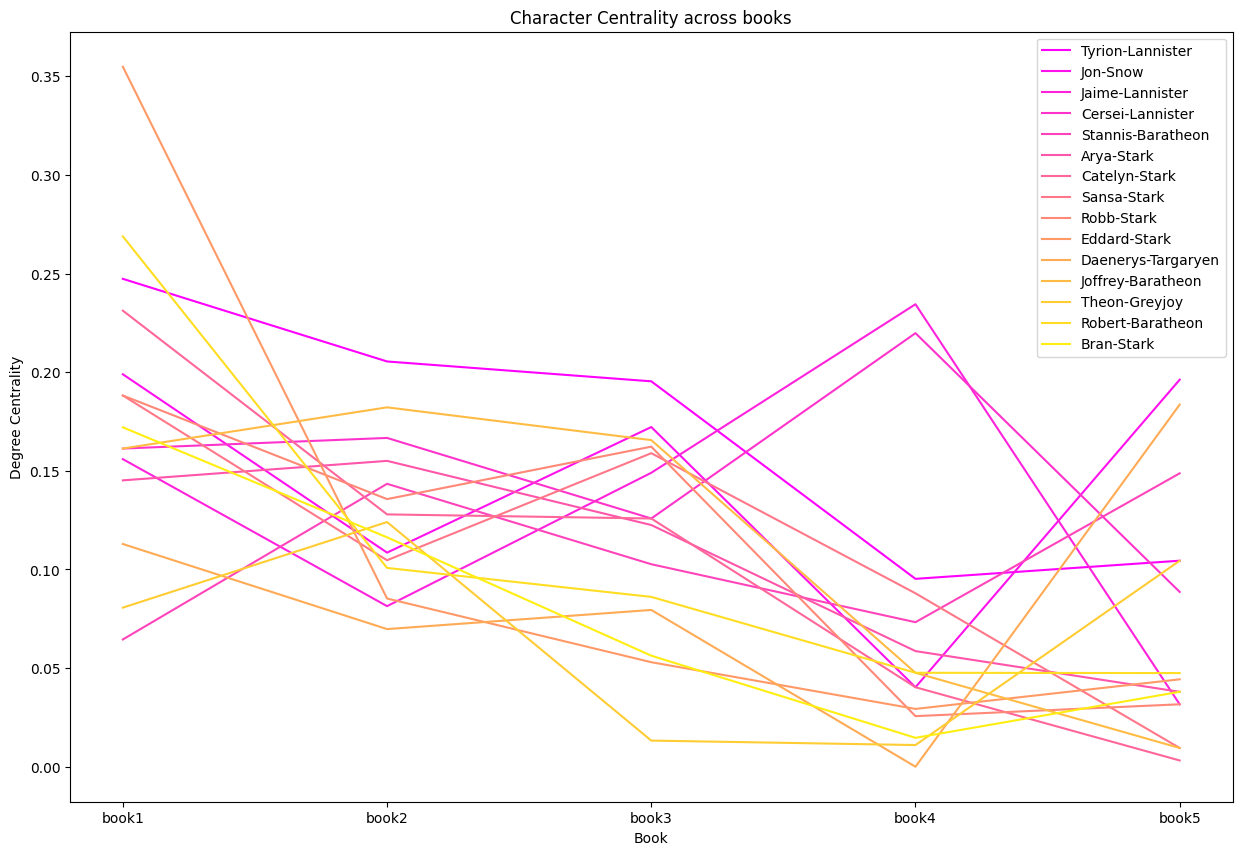

Character whose importance escalates up to book 4: Jaime-Lannister
Character whose significance diminishes throughout the series: Theon-Greyjoy


In [604]:
## YOUR CODE STARTS HERE
candidates = [item[0] for item in top_15_nodes]
## YOU MAY USE THIS PART or IMPLEMENT YOUR OWN
deg_centrality_books = np.zeros((15,5))
for book_num, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G]):
    deg_centrality = nx.degree_centrality(book_G)
    for i, candidate in enumerate(candidates):
        if candidate in deg_centrality:
            deg_centrality_books[i][book_num] = deg_centrality[candidate]
        else:
            deg_centrality_books[i][book_num] = 0

fig, ax = plt.subplots(figsize=(15, 10))
books_axis = [f'book{i+1}' for i in range(5)]

# If use default cm the colors start to rotate after 8 categories
NUM_COLORS = 15
cm = plt.get_cmap('spring')
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i, candidate in enumerate(candidates):
    plt.plot(books_axis, deg_centrality_books[i], label=candidate)

plt.xlabel("Book")
plt.ylabel("Degree Centrality")
plt.legend()
plt.title('Character Centrality across books')
plt.show()

# Identify character whose importance escalates up to book 4
escalating_character = candidates[np.argmax(deg_centrality_books[:, 3])]

# Identify character whose significance diminishes throughout the series
diminishing_character = candidates[np.argmin(np.sum(deg_centrality_books, axis=1))]

print(f"Character whose importance escalates up to book 4: {escalating_character}")
print(f"Character whose significance diminishes throughout the series: {diminishing_character}")


**Enter answer here:** The character whose importance escalates up to book 4 is Jaime-Lannister. A character whose significance diminishes throughout the series is Theon-Greyjoy

